In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
mnist.data.shape,mnist.target.shape

((70000, 784), (70000,))

In [5]:
X,y = mnist.data,mnist.target
print(X.shape)
print(y.shape)
print(y[:10])

(70000, 784)
(70000,)
['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


In [6]:
def plot_image(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')



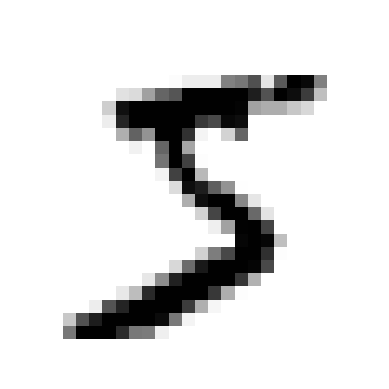

In [7]:
some_digit = X[0]
plot_image(some_digit)
plt.show()

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42,n_jobs=-1)
sgd_clf.fit(X_train,y_train_5)

,"loss loss: {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'The loss function to be used.- 'hinge' gives a linear SVM.- 'log_loss' gives logistic regression, a probabilistic classifier.- 'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.- 'squared_hinge' is like hinge but is quadratically penalized.- 'perceptron' is the linear loss used by the perceptron algorithm.- The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see :class:`~sklearn.linear_model.SGDRegressor` for a description.More details about the losses formulas can be found in the :ref:`User Guide` and you can find a visualisation of the lossfunctions in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py`.",'hinge'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",-1


In [11]:
print(some_digit.shape)
# we need to transform this into a 2d array
# we can either reshape(1,-1) or add another dimension like [some_digit]

(784,)


In [12]:
print(sgd_clf.predict([some_digit]))

[ True]


In [13]:
print(sgd_clf.predict(some_digit.reshape(1,-1)))

[ True]


In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,n_jobs=-1,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

Accuracy is the ratio of correct predictions

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

kfolds = StratifiedKFold(n_splits=3)

for train_index,test_index in kfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred)) 
    

0.95035
0.96035
0.9604


In [16]:
from sklearn.dummy import DummyClassifier
# dummy classifier classifies with most the frequent class 
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy',n_jobs=-1)

array([0.90965, 0.90965, 0.90965])

Confusion Matrix


In [18]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,n_jobs=-1)

In [19]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

A confusion matrix gives the count for no of instances of class A that were identifed as class B for all given A/B pairs

1. The  rows are actual classes and columns denote the predicted classes
2. first row represent actual non-5 class images:
- 53892 non-5's were correctly classified as non-5. These are called True Negatives.
- 687 non-5s were incorrectly classified as 5. These are called False Positives (Type-1 errors).
3. Second row represents the actual 5 class images:
- 1891 5's that are incorrectly classified as non-5. These are called False Negatives.
- 3530 5's correctly classified as 5's. These are called True Positives.

Precision and Recall

- Precision: Refers to the accuracy of positive predictions.
- Recall: Also called Sensitivity or True Positive Rate (TPR) is the ratio of positive instances correctly identified by the classifier.

In [20]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [21]:
precision = cm[1,1]/(cm[1,1] + cm[0,1])
print("Precision score:",precision)

Precision score: 0.8370879772350012


In [22]:
from sklearn.metrics import recall_score

recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [23]:
recall = cm[1,1]/(cm[1,0] + cm[1,1])
print("Recall score:",recall)

Recall score: 0.6511713705958311


In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343847

PR Tradeoff

In [25]:
y_scores = sgd_clf.decision_function(some_digit.reshape(1,-1))
print(y_scores)

[2164.22030239]


In [26]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
threshold = 3000 
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [28]:
y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_5,
                             cv=3,
                             method='decision_function',
                             n_jobs=-1)
print(y_scores)
print(y_scores.shape)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]
(60000,)


In [29]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_score=y_scores)
print("precisions shape:",precisions.shape)
print("thresholds shape:",thresholds.shape)
print("recalls shape:",recalls.shape)

precisions shape: (60001,)
thresholds shape: (60000,)
recalls shape: (60001,)


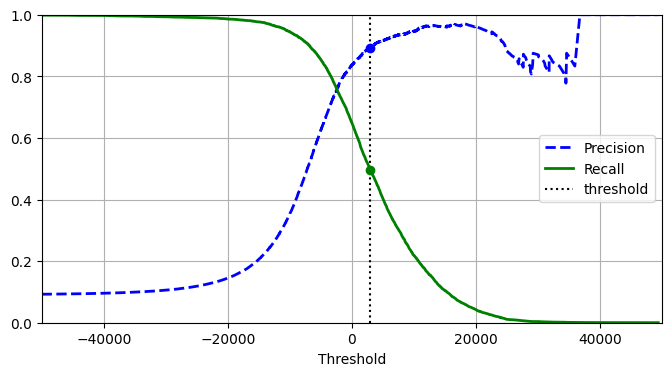

In [30]:
plt.figure(figsize=(8,4))
plt.plot(thresholds,precisions[:-1],"b--",label="Precision",linewidth=2)
# small note matplotlib uses this compact format [color][marker][linestyle] 
# we can also pass these as seperate parameters
plt.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label="threshold")

idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx],precisions[idx],"bo")
plt.plot(thresholds[idx],recalls[idx],"go")
plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

A good way to select precision-recall trade off is to plot precision directly against recall.

In [31]:
print(recalls[idx])
print(precisions[idx])

0.4967718133185759
0.8911317008603574


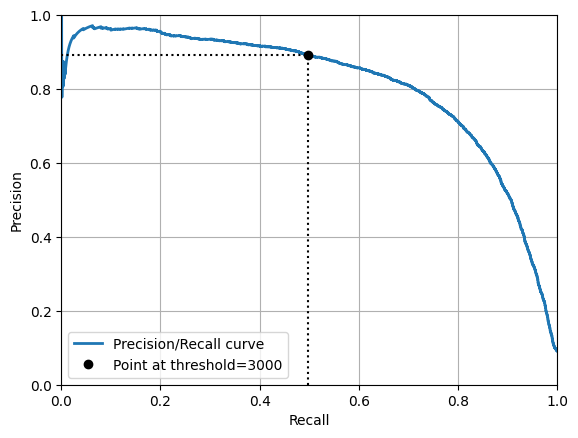

In [32]:
import matplotlib.patches as patches 

plt.plot(recalls,precisions,linewidth=2,label="Precision/Recall curve")

plt.plot([recalls[idx],recalls[idx]],[0.,precisions[idx]],"k:")
plt.plot([0.0,recalls[idx]],[precisions[idx],precisions[idx]],"k:")
plt.plot([recalls[idx]],[precisions[idx]],"ko",label="Point at threshold=3000")

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()


We can find the lowest threshold that gives us 0.90 precision

In [33]:
idx_for_precision_90 = (precisions >= 0.90).argmax()
threshold_90_precision = thresholds[idx_for_precision_90]

In [34]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [35]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [36]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [37]:
y_train_5

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [38]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

ROC Curve

In [39]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)
print("fpr shape:",fpr.shape)
print("tpr shape:",tpr.shape)
print("thresholds shape:",thresholds.shape)

fpr shape: (3908,)
tpr shape: (3908,)
thresholds shape: (3908,)


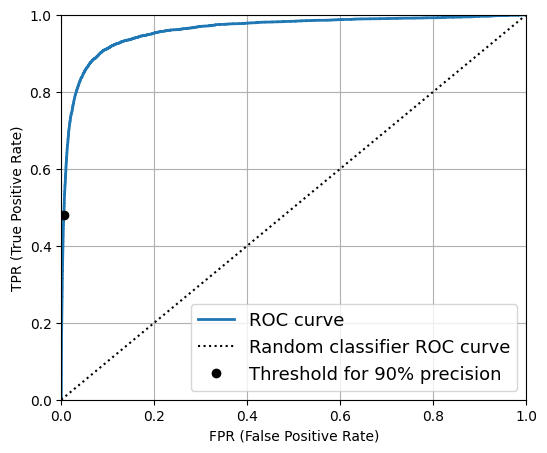

In [40]:
idx_for_threshold_90 = (thresholds <= threshold_90_precision).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_90],fpr[idx_for_threshold_90]

plt.figure(figsize=(6,5))
plt.plot(fpr,tpr,linewidth=2,label="ROC curve")
plt.plot([0,1],[0,1],"k:",label="Random classifier ROC curve")
plt.plot([fpr_90],[tpr_90],"ko",label="Threshold for 90% precision")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [41]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train_5,y_score=y_scores)

0.9604938554008616

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_jobs=-1,random_state=42) 

In [43]:
y_probas_forest = cross_val_predict(forest_clf,
                                    X_train,
                                    y_train_5,
                                    cv=3,
                                    n_jobs=-1,
                                    method='predict_proba')
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]], shape=(60000, 2))

In [44]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

For a binary classifier predict_proba(X) returns array of shape:
- `(n_samples,2)`
- each row contains:
- `[P(class_0),P(class_1)]`
- first row contains the probability of sample belonging in class 0.
- second row contains the probability of sample belonging in class 1. 





In [ ]:
idx_50_to_60 = (y_probas_forest[:,1] > 0.50) & (y_probas_forest[:,1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")
# Note we cannot use the len() function here

94.0%


In [50]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06], shape=(60000,))

In [51]:
precisions_forest,recalls_forest,thresholds_forests = precision_recall_curve(y_train_5,
                                                                             y_scores_forest)

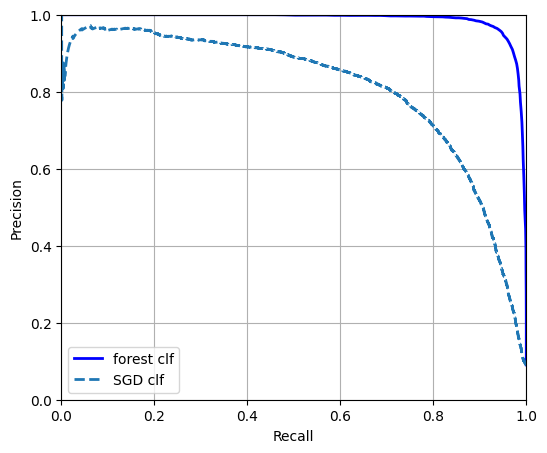

In [54]:
plt.figure(figsize=(6,5))

plt.plot(recalls_forest,precisions_forest,"b-",linewidth=2,label="forest clf")
plt.plot(recalls,precisions,'--',linewidth=2,label="SGD clf")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [55]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5,y_train_pred_forest)

0.9274509803921569

In [56]:
precision_score(y_train_5,y_train_pred_forest)

0.9897468089558485

In [57]:
recall_score(y_train_5,y_train_pred_forest)

0.8725327430363402